<h1>Projekt: Simulace pohybů planet ve 2D</h1>
<h3>Marek Prudil (pru0052)</h3>

<h3>Popis:</h3>
Tento projekt se zabývá simulací pohybu planet (těles) ve 2D prostoru.
Uvažujeme gravitační interakce mezi každou dvojicí těles v podobě
Newtonova gravitačního zákona.

Cílem je implementovat numerickou aproximaci řešení pohybových rovnic
planet a vytvoření vizualizace tohoto pohybu. Pro simulaci bude použita
časová diskretizace, přičemž v každém časovém kroku je uvažováno
konstantní zrychlení $a=\frac{F_{g}}{m}$ způsobené gravitační silou
mezi každou dvojicí planet. $a$ je opět pouze velikost zrychlení, směr
je stejný jako směr síly.

Výstupem projektu je vizualizace pohybu pomocí knihovny Matplotlib,
která zobrazuje pohyb planet v čase a zobrazuje jejich trajektorie.

In [3]:
from planets_project import load_from_json, generate_random_planets, Planet, SystemOfPlanets

<h3>1. Example: Sluneční soustava</h3>

V souboru `test1.py` jsou uložené hmotnosti, počáteční pozice a rychlosti jednotlivých planet sluneční soustavy.

Metoda `draw_current_state` vykreslí aktuální pozice těles, v tomto případě jsme s nimi ještě nehýbali, takže se jedná o počáteční stav.

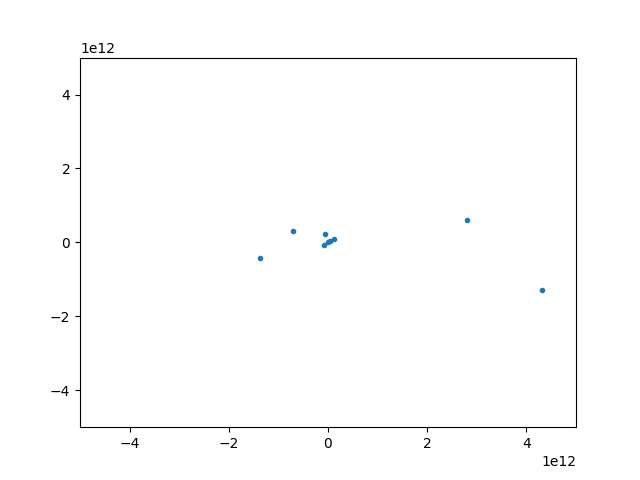

In [4]:
%matplotlib widget
solar_system = SystemOfPlanets(load_from_json('testdata/test1.json'))

solar_system.draw_current_state(5e12)

Metoda `simulate_movement` provede výpočet pozic planet v čase, první parametr je délka simulace a druhý parametr délka časového kroku (v sekundách).

Metoda `draw_trajectories` vykreslí trajektorie všech těles za dobu simulace, parametrem je velikost v metrech (do kladných i záporných hodnot). V tomto případě je velikost nastavená tak, aby šly vidět první 4 planety. Že kód počítá správně, můžeme ověřit empiricky třeba tak, že zadáme délku simulace 350 dní, tak by měla Země udělat skoro jeden oběh Slunce, a Mars zhruba polovinu (doba oběhu 687 dní).

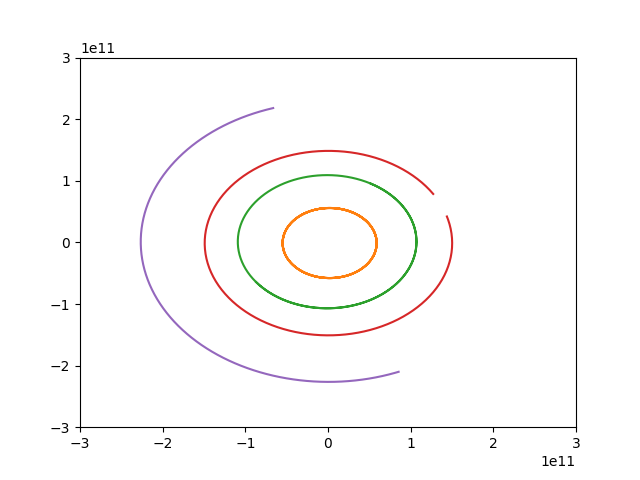

In [5]:
solar_system.simulate_movement(60*60*24*350,60*60*24)

solar_system.draw_trajectories(3e11)

Nyní necháme simulaci "běžet 10 let" a vykreslíme trajektorie všech planet. Vidíme, že Jupiter s dobou oběhu 12 let téměř dokončil jeden oběh.

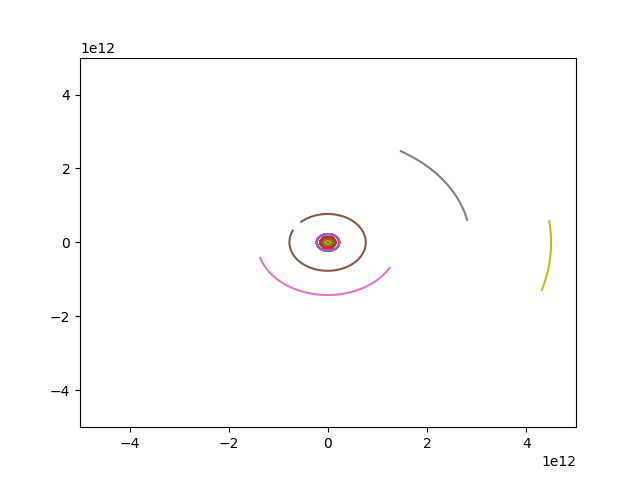

In [6]:
solar_system.simulate_movement(60*60*24*365*10, 60*60*24)
solar_system.draw_trajectories(5e12)

Metoda `show_animation` zobrazí animaci pohybu planet. (opět parametr size)

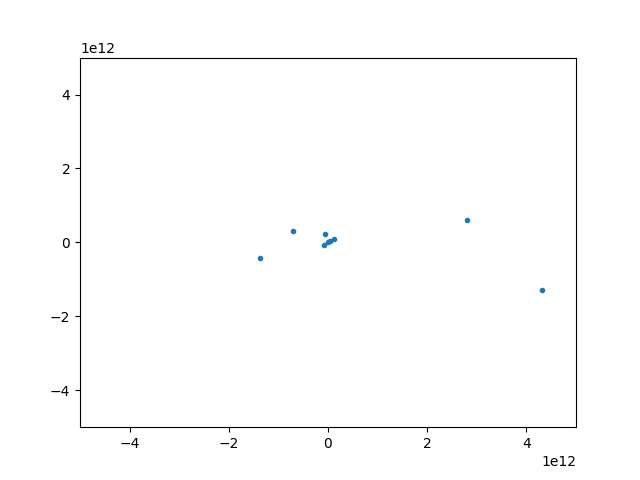

In [7]:
solar_system.show_animation(5e12)

<h3>2. Example: 3 tělesa</h3>

V souboru `test2.py` jsou uložená počáteční data tří těles s podobnou hmotností a malými počátečními rychlostmi.

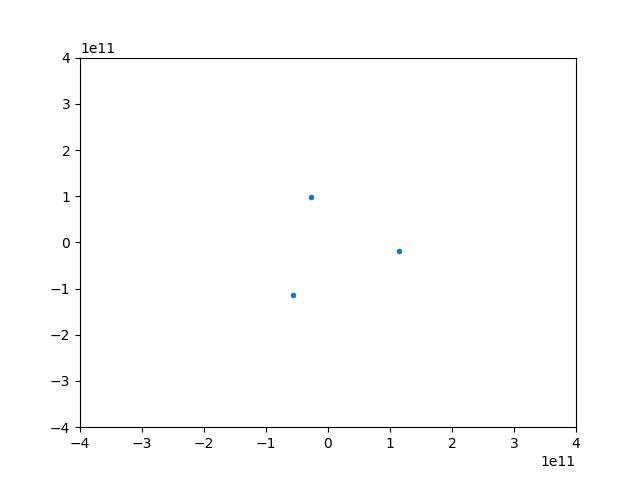

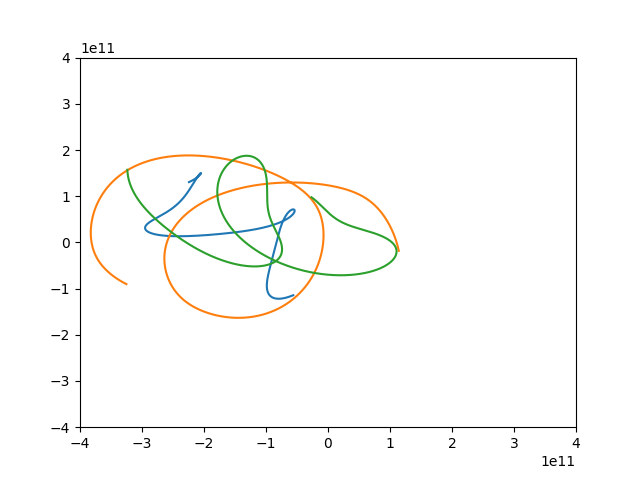

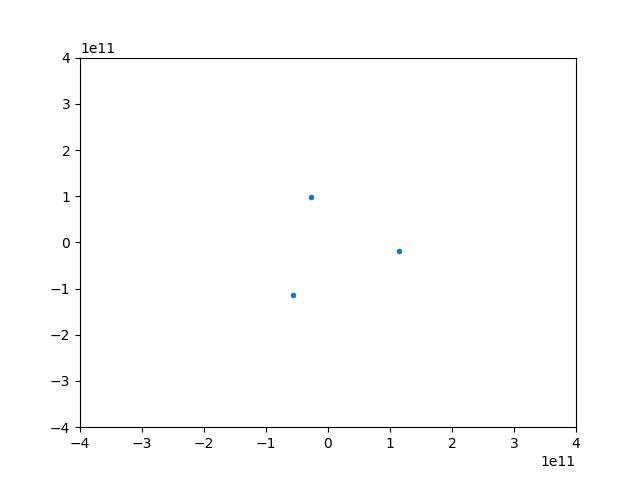

In [8]:
three_body = SystemOfPlanets(load_from_json('testdata/test2.json'))
three_body.draw_current_state(4e11)
three_body.simulate_movement(3e9, 1e5)

three_body.draw_trajectories(4e11)

three_body.show_animation(4e11)

<h3>3. Example: Náhodné generování</h3>

Funkce `generate_random_planets` vytvoří list planet s náhodně vygenerovanými počátečními podmínkami. Parametr je počet planet, které chceme vygenerovat. Pozice v počátečním stavu se vždy vejde do okna s velikostí 1e11.

In [9]:
generate_random_planets(4)

[Planet(mass=4.93620954151012e+26, position=array([-4.18051013e+10,  6.60922884e+10]), velocity=array([ 783.57448045, -422.1042552 ])),
 Planet(mass=9.225709526346936e+26, position=array([-2.62592258e+10,  7.41614567e+10]), velocity=array([-478.81549511, -648.20524238])),
 Planet(mass=6.198914589609599e+26, position=array([ 6.40572774e+10, -5.94273302e+09]), velocity=array([865.9684153 , 637.48455384])),
 Planet(mass=6.47269930116016e+26, position=array([-9.46228535e+10, -2.75665677e+09]), velocity=array([-489.84783682,  272.55947642]))]

Při každém spuštění buňky dostaneme jinou počáteční konfiguraci.

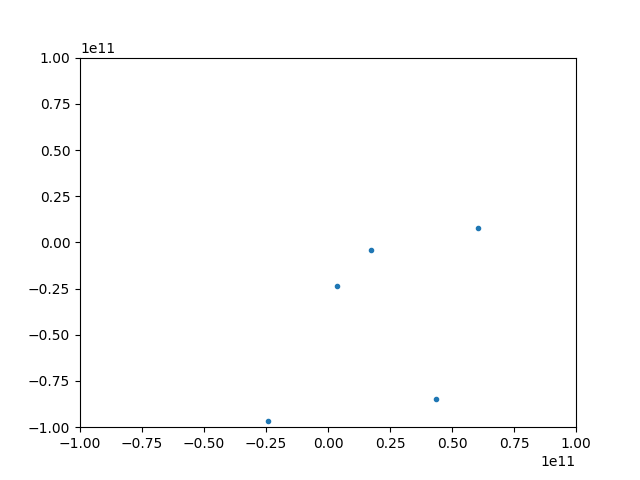

In [10]:
random_system = SystemOfPlanets(generate_random_planets(5))

random_system.draw_current_state(1e11)

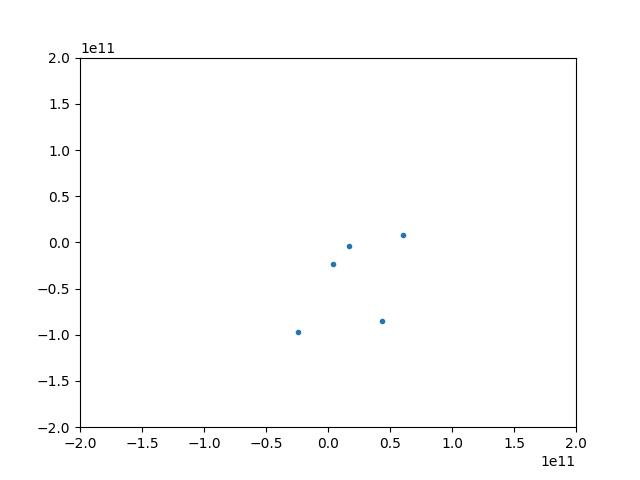

In [11]:
random_system.simulate_movement(1e8,1e5)
random_system.show_animation(2e11)


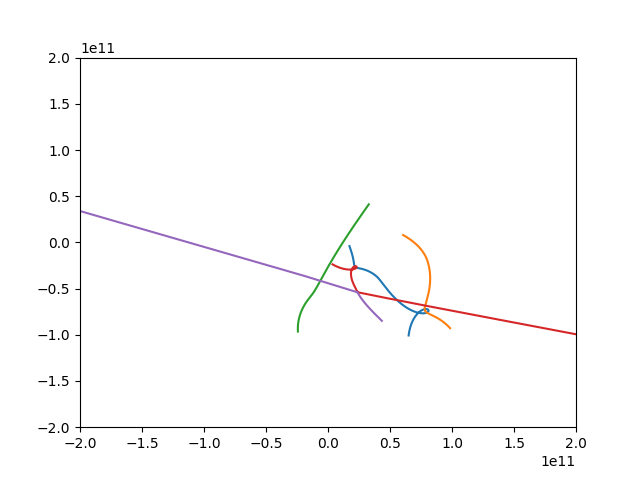

In [12]:
random_system.draw_trajectories(2e11)